In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smagni","key":"eb7eafd59b1120195c28192cf629a2c9"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d zalando-research/fashionmnist

 89% 61.0M/68.8M [00:00<00:00, 186MB/s]
100% 68.8M/68.8M [00:00<00:00, 198MB/s]


In [4]:
!unzip '/content/fashionmnist.zip'

Archive:  /content/fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


# Start

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/fashion-mnist_train.csv')

In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [8]:
# target and feature
y = df['label']
X = df.iloc[:, 1:].values

In [9]:
X.shape, y.shape

((60000, 784), (60000,))

In [10]:
def plot_item(img):
    img = img.reshape(28, 28)
    plt.imshow(img, cmap = "gray")
    plt.axis("off")
    plt.show()

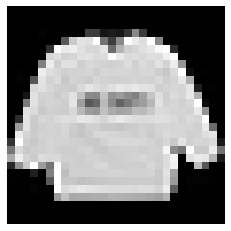

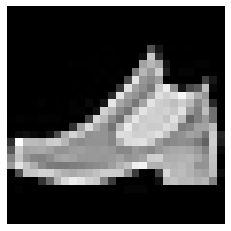

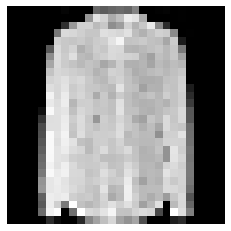

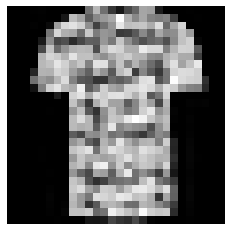

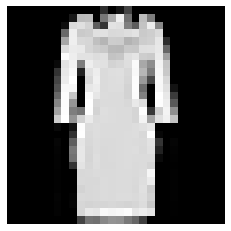

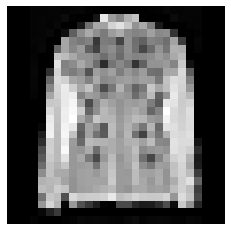

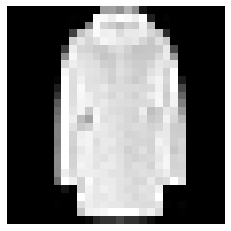

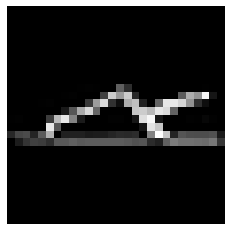

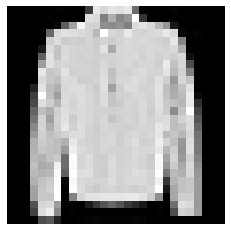

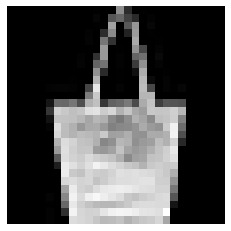

In [11]:
i = 0
while i < 10:
    plot_item(X[i])
    i += 1

In [12]:
y = np.array(y)
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# target is multiclass --> onehot encoding of y
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

In [14]:
y_onehot = one.fit_transform(y.reshape(-1,1)).toarray()

In [15]:
print(y[:10])
y_onehot[:10]

[2 9 6 0 3 4 4 5 4 8]


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [16]:
X.shape, y_onehot.shape

((60000, 784), (60000, 10))

# NN 
## Multiclass classification

In [17]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [18]:
#step 1
model = Sequential()

In [19]:
#step 2
model.add(Dense(128, activation= 'relu', input_shape = (784,))) # 1 hidden layer

In [20]:
model.add(Dense(128, activation= 'relu')) # 2 hidden layer

In [21]:
# step 3
model.add(Dense(10, activation= 'softmax')) # multiclass --> softmax and binary class ---> sigmoid

In [22]:
# step 4
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X, y_onehot, batch_size = 64, epochs = 20, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 122us/step - loss: 3.2933 - accuracy: 0.7374 - val_loss: 0.8794 - val_accuracy: 0.7678
Epoch 2/20
48000/48000 [==============================] - 4s 89us/step - loss: 0.7102 - accuracy: 0.7934 - val_loss: 0.6628 - val_accuracy: 0.8052
Epoch 3/20
48000/48000 [==============================] - 4s 88us/step - loss: 0.5642 - accuracy: 0.8159 - val_loss: 0.6162 - val_accuracy: 0.8120
Epoch 4/20
48000/48000 [==============================] - 4s 89us/step - loss: 0.5173 - accuracy: 0.8277 - val_loss: 0.6189 - val_accuracy: 0.7969
Epoch 5/20
48000/48000 [==============================] - 4s 89us/step - loss: 0.5000 - accuracy: 0.8295 - val_loss: 0.5836 - val_accuracy: 0.8015
Epoch 6/20
48000/48000 [==============================] - 4s 89us/step - loss: 0.4668 - accuracy: 0.8377 - val_loss: 0.4924 - val_accuracy: 0.8381
Epoch 7/20
48000/48000 [==============================] - 4s 89us/s

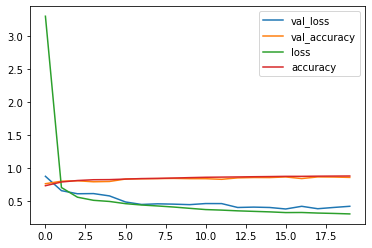

In [26]:
pd.DataFrame(model.history.history).plot()
plt.show()

In [27]:
test = pd.read_csv("/content/fashion-mnist_test.csv")

In [28]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [29]:
y_test = test['label']
X_test = test.iloc[:, 1:].values

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred[:10]

array([[7.28775859e-01, 3.87414502e-06, 1.38493997e-04, 9.53216897e-07,
        1.33190842e-05, 1.64226152e-12, 2.71034658e-01, 8.09968321e-16,
        3.28661990e-05, 8.64180472e-13],
       [1.90452266e-27, 1.00000000e+00, 3.03287959e-37, 4.68974432e-18,
        2.18891015e-18, 0.00000000e+00, 1.08050704e-23, 0.00000000e+00,
        4.02787045e-38, 0.00000000e+00],
       [1.57851223e-02, 2.11740247e-04, 6.43574059e-01, 1.32734620e-03,
        3.54379043e-02, 1.00518392e-07, 2.99490958e-01, 3.83312546e-08,
        4.17231489e-03, 3.72206017e-07],
       [6.13483787e-01, 3.36083103e-05, 1.17573738e-01, 6.34840317e-03,
        6.31657708e-03, 9.63352613e-06, 2.22832069e-01, 1.35559008e-09,
        3.34016345e-02, 5.14066642e-07],
       [1.50591135e-03, 6.05573365e-03, 2.34353240e-03, 1.30182415e-01,
        8.55109394e-01, 6.65337230e-10, 4.70736250e-03, 3.29430208e-08,
        9.56466611e-05, 3.96257971e-10],
       [2.15190828e-01, 5.35227917e-03, 1.06305704e-01, 8.27718228e-02,
   

In [34]:
pred_new = np.argmax(y_pred, axis = 1)

In [35]:
pred_new[:10]

array([0, 1, 2, 0, 4, 6, 8, 6, 5, 0])

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
print(confusion_matrix(y_test, pred_new))

[[850   1   6   6   5   1 120   0  11   0]
 [  7 982   0   6   1   0   4   0   0   0]
 [ 14   3 697   7 139   0 127   0  13   0]
 [105  12   7 777  71   2  23   0   3   0]
 [  1   1  40   6 882   0  66   0   4   0]
 [  0   0   0   1   0 958   0  28   6   7]
 [151   3  51   8  72   0 696   0  19   0]
 [  0   0   0   0   0  40   0 920   2  38]
 [  4   1   0   2   7   2  10   1 973   0]
 [  0   0   0   0   0  63   0  37   2 898]]


In [39]:
print(classification_report(y_test, pred_new))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1000
           1       0.98      0.98      0.98      1000
           2       0.87      0.70      0.77      1000
           3       0.96      0.78      0.86      1000
           4       0.75      0.88      0.81      1000
           5       0.90      0.96      0.93      1000
           6       0.67      0.70      0.68      1000
           7       0.93      0.92      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.95      0.90      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

